In [290]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


In [291]:
rand_seed = 789456 #do not change this random seed anytime.
test_participant = 20

In [292]:
data = pd.read_csv('../Collected Data/preprocessed/traindata/preprocessed_traindata'+str(test_participant)+'.csv')

X = data.drop('Label', axis=1) #features
y = data['Label']
y = y.str.strip()
len(X)
X.tail()


,avg_accX,min_accX,max_accX,var_accX,std_accX,avg_accY,min_accY,max_accY,var_accY,std_accY,...,min_magnitude,max_magnitude,var_magnitude,std_magnitude,var_pressure,range_pressure,std_pressure,slope_pressure,kurtosis_pressure,skew_pressure
7277,-0.699656,-1.369385,-0.175537,0.071539,0.266797,0.016152,-0.605957,0.331543,0.042905,0.206616,...,0.581143,1.655539,0.062027,0.248429,0.028648,0.732341,0.168833,0.000869,-0.354311,0.405978
7278,-0.920286,-1.554565,-0.463623,0.051270,0.225863,0.148145,-0.246582,0.537964,0.024403,0.155824,...,0.601171,1.697793,0.055384,0.234750,0.002567,0.215438,0.050536,0.000640,0.640439,-1.064501
7279,-0.858254,-1.183960,-0.514893,0.026653,0.162849,0.125621,-0.135010,0.486938,0.020475,0.142732,...,0.557174,1.362724,0.032417,0.179595,0.004915,0.388146,0.069929,0.000298,2.124373,0.928071
7280,-0.773865,-1.334839,-0.460693,0.034093,0.184180,0.010675,-0.305542,0.178467,0.013334,0.115183,...,0.730775,1.563537,0.032315,0.179313,0.022076,0.635979,0.148209,0.000264,0.056936,0.609047
7281,-0.802524,-1.200439,-0.459473,0.032913,0.180966,0.056221,-0.144409,0.205200,0.008546,0.092214,...,0.746551,1.395415,0.030018,0.172822,0.014732,0.551770,0.121074,0.000439,0.798906,0.756359


In [293]:
label_encoder = LabelEncoder()

encoded_traininglabels = label_encoder.fit_transform(y)

print("Encoded Labels:", encoded_traininglabels)

Encoded Labels: [0 0 0 ... 3 3 3]


In [294]:
label_mapping = dict(zip(encoded_traininglabels, y))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 'Null', 1: 'lift down', 3: 'stairs down', 4: 'stairs up', 2: 'lift up'}


In [295]:
y = encoded_traininglabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y).items()))

[(0, 2939), (1, 331), (2, 381), (3, 1037), (4, 1137)]
[(0, 3650), (1, 428), (2, 486), (3, 1283), (4, 1435)]


In [297]:
Xtrain_resampled, ytrain_resampled = RandomOverSampler(sampling_strategy= "not majority", random_state=rand_seed).fit_resample(X_train, y_train)
print (sorted(Counter(ytrain_resampled).items())) 

X_resampled, y_resampled = RandomOverSampler(sampling_strategy= "not majority", random_state=rand_seed).fit_resample(X, y)
print (sorted(Counter(y_resampled).items()))

[(0, 2939), (1, 2939), (2, 2939), (3, 2939), (4, 2939)]
[(0, 3650), (1, 3650), (2, 3650), (3, 3650), (4, 3650)]


In [185]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 225, 250, 275, 300, 325, 350],  # Testing different values for n_estimators
    'max_depth': [None,5, 10, 15, 20],       # Testing different values for max_depth
}

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=rand_seed)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_resampled, y_resampled)

# Get the best model and best parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


KeyboardInterrupt: 

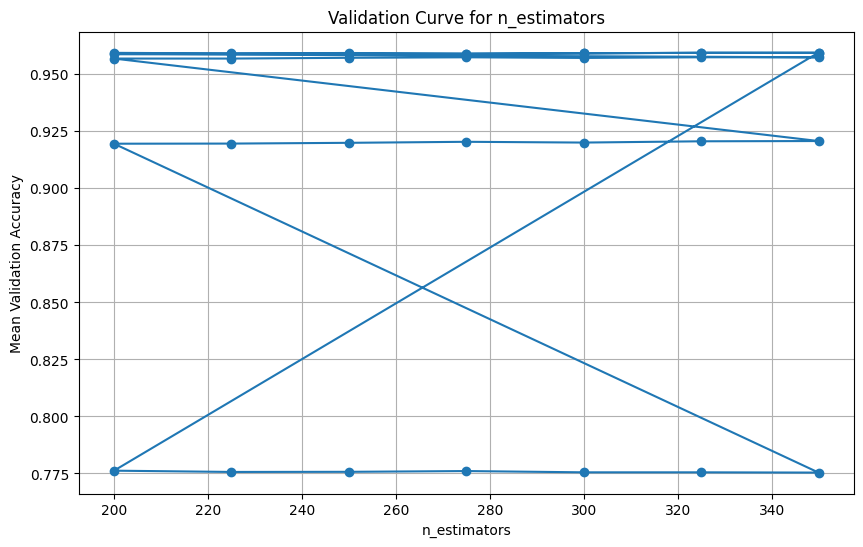

In [136]:
import matplotlib.pyplot as plt

# Extract and plot mean validation scores
mean_scores = grid_search.cv_results_['mean_test_score']
params_n_estimators = [param['n_estimators'] for param in grid_search.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.plot(params_n_estimators, mean_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Validation Accuracy')
plt.title('Validation Curve for n_estimators')
plt.grid(True)
plt.show()


In [298]:
# Training the model using the best parameters
final_rf = RandomForestClassifier(n_estimators=200, random_state=rand_seed)
final_rf.fit(X_resampled, y_resampled) #use xtrain_resampled & ytrain_resampled for training accuracy. x_resampled and y_resampled for testing accuracy

RandomForestClassifier(n_estimators=200, random_state=789456)

In [299]:
data = pd.read_csv('../Collected Data/preprocessed/preprocessed_data'+str(test_participant)+'.csv')

xtest = data.drop('Label', axis=1) #features
ytest = data['Label'].str.strip()


In [300]:
encoded_testinglabels = label_encoder.fit_transform(ytest)
label_mapping = dict(zip(encoded_testinglabels, ytest))
print("Label Mapping:", label_mapping)
print(encoded_testinglabels)

Label Mapping: {0: 'Null', 1: 'lift down', 4: 'stairs up', 3: 'stairs down', 2: 'lift up'}
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 4 4 4 4 0 0 0 0 0 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 4 4 4 4 4 4 4 4 4 0 0 0 3 3 3
 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 2 2 2 2 2 2 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0
 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 3 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 0 0 0]


In [301]:
y_pred = final_rf.predict(xtest)
ytest = encoded_testinglabels
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)
f1_micro = f1_score(ytest, y_pred, average='micro')
f1_macro = f1_score(ytest, y_pred, average='macro')
f1_weighted = f1_score(ytest, y_pred, average='weighted')
print("F1 Score micro:", f1_micro)
print("F1 Score macro:", f1_macro)
print("F1 Score weighted:", f1_weighted)

Accuracy: 0.7662650602409639
F1 Score micro: 0.7662650602409639
F1 Score macro: 0.7316492638236178
F1 Score weighted: 0.7605645952447682


In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [303]:
import numpy as np
cm = confusion_matrix(ytest, y_pred,  labels=np.arange(len(label_encoder.classes_)))

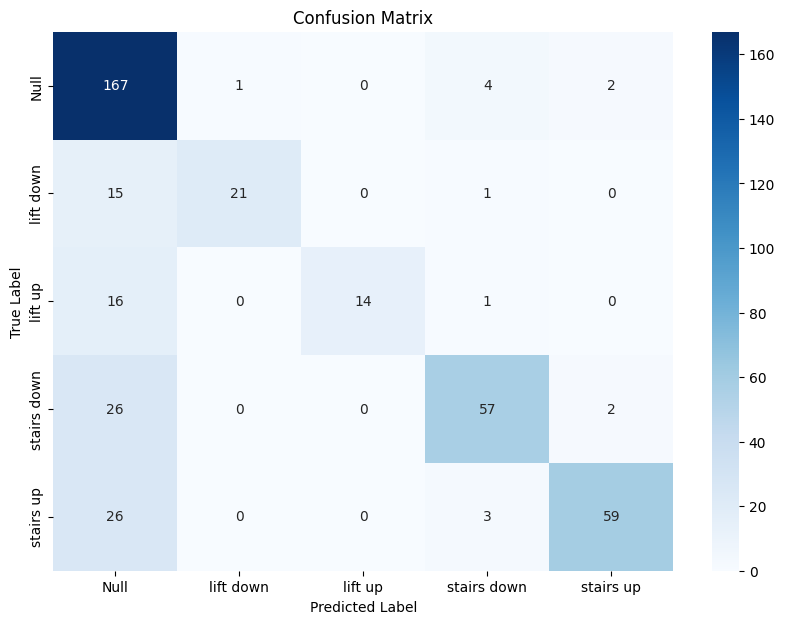

In [304]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [305]:
importances = final_rf.feature_importances_
importances = list(map(lambda x: str(x), importances))
print(",".join(importances))

0.024460075837558375,0.026987479743641976,0.023931525468163267,0.03569905664300278,0.03440831030718239,0.020025566826709532,0.01885689802971083,0.0210547020326691,0.021475625286661807,0.022450170081088742,0.019134664905722677,0.019927705478495695,0.01839000766581308,0.025274981581094466,0.028455003331518295,0.026538691961641245,0.03204147883317291,0.048395409661049375,0.07861973940307238,0.07366041835563013,0.031620852433156085,0.026152358542004334,0.030316176531951185,0.24346205156570044,0.02961974069785696,0.019041308795731873


In [29]:
feature_importances = feature_importances.set_index('Feature')

# Print the transposed DataFrame
print(feature_importances)


AttributeError: 'list' object has no attribute 'set_index'